In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import os
print(os.listdir())

['.ipynb_checkpoints', 'cars_dataset.csv', 'Cars_decision_model.ipynb', 'handson-ml-master', 'Lesson01-Classification.ipynb', 'Machine_Learning_2018-master', 'nbs', 'Week01', 'your-first-kaggle-submission-master']


In [2]:
%time data = pd.read_csv('cars_dataset.csv') 
print("shape of the Data: ", data.shape)

Wall time: 5 ms
shape of the Data:  (1728, 7)


In [3]:
data.columns = ['Price', 'Maintenance Cost', 'Number of Doors', 'Capacity', 'Size of Luggage Boot', 'safety', 'Decision' ]

# Data 


In [4]:
data.head()

,Price,Maintenance Cost,Number of Doors,Capacity,Size of Luggage Boot,safety,Decision
0,vhigh,vhigh,two,two,small,low,unacc
1,vhigh,vhigh,two,two,small,med,unacc
2,vhigh,vhigh,two,two,small,high,unacc
3,vhigh,vhigh,two,two,med,low,unacc
4,vhigh,vhigh,two,two,med,med,unacc


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
Price                   1728 non-null object
Maintenance Cost        1728 non-null object
Number of Doors         1728 non-null object
Capacity                1728 non-null object
Size of Luggage Boot    1728 non-null object
safety                  1728 non-null object
Decision                1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


In [6]:
data.describe()

,Price,Maintenance Cost,Number of Doors,Capacity,Size of Luggage Boot,safety,Decision
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,low,low,two,more,small,low,unacc
freq,432,432,432,576,576,576,1210


In [7]:
data.isnull().any()

Price                   False
Maintenance Cost        False
Number of Doors         False
Capacity                False
Size of Luggage Boot    False
safety                  False
Decision                False
dtype: bool

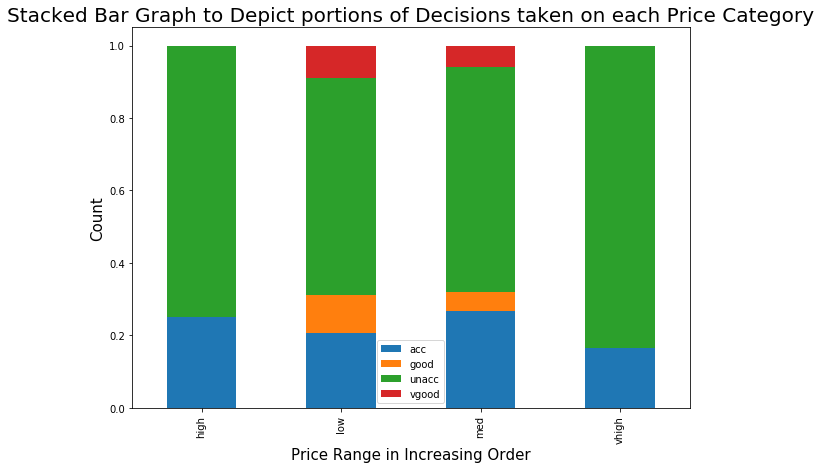

In [8]:
price = pd.crosstab(data['Price'], data['Decision'])
price.div(price.sum(1).astype(float), axis = 0).plot(kind ='bar', stacked=True, figsize=(10,7))
plt.title('Stacked Bar Graph to Depict portions of Decisions taken on each Price Category', fontsize = 20)
plt.xlabel('Price Range in Increasing Order', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.legend()
plt.show()

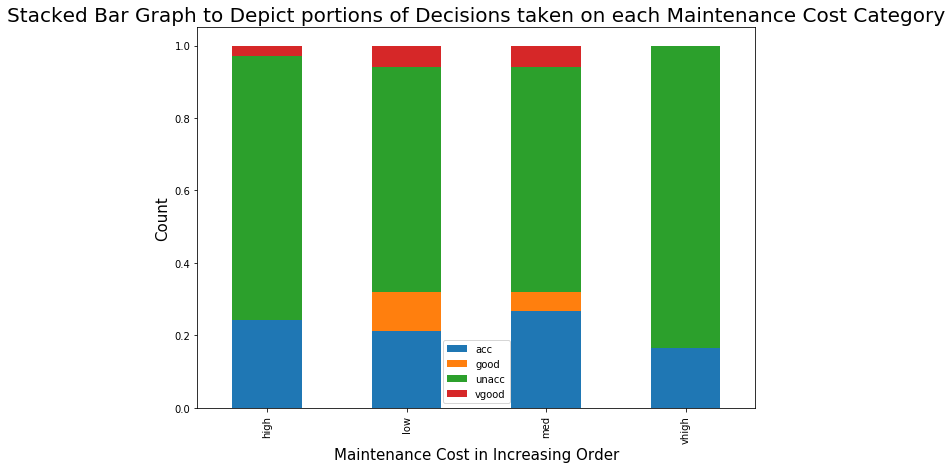

In [9]:
mc = pd.crosstab(data['Maintenance Cost'], data['Decision'])
mc.div(mc.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 7))

plt.title('Stacked Bar Graph to Depict portions of Decisions taken on each Maintenance Cost Category', fontsize = 20)
plt.xlabel('Maintenance Cost in Increasing Order', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.legend()
plt.show()

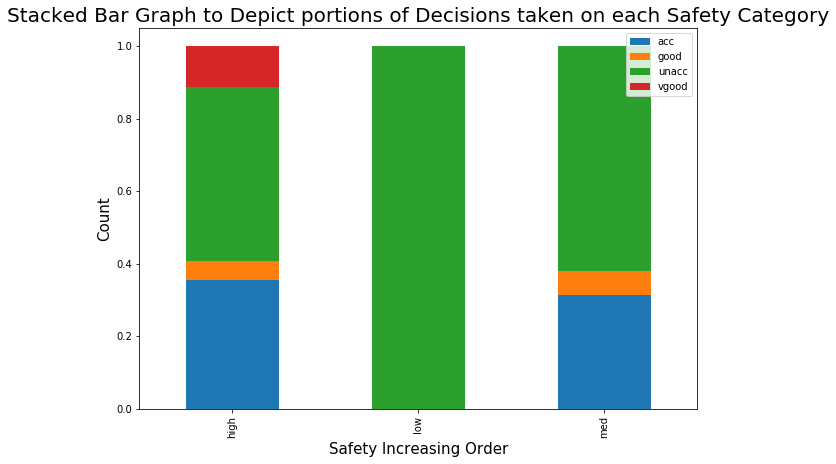

In [10]:
safety = pd.crosstab(data['safety'], data['Decision'])
safety.div(safety.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 7))

plt.title('Stacked Bar Graph to Depict portions of Decisions taken on each Safety Category', fontsize = 20)
plt.xlabel('Safety Increasing Order', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.legend()
plt.show()

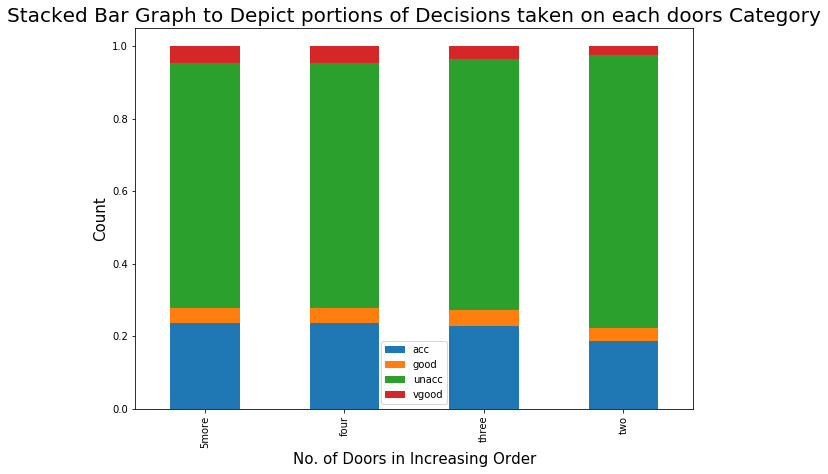

In [11]:
doors = pd.crosstab(data['Number of Doors'], data['Decision'])
doors.div(doors.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 7))

plt.title('Stacked Bar Graph to Depict portions of Decisions taken on each doors Category', fontsize = 20)
plt.xlabel('No. of Doors in Increasing Order', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.legend()
plt.show()

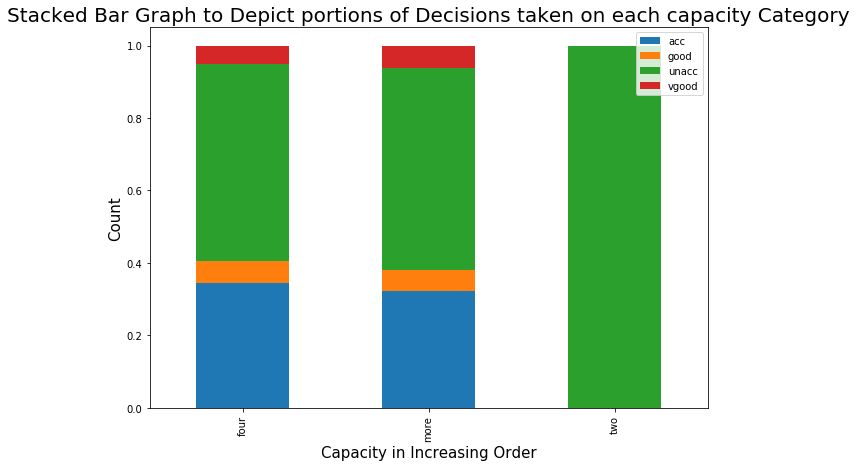

In [12]:
capacity = pd.crosstab(data['Capacity'], data['Decision'])
capacity.div(capacity.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 7))

plt.title('Stacked Bar Graph to Depict portions of Decisions taken on each capacity Category', fontsize = 20)
plt.xlabel('Capacity in Increasing Order', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.legend()
plt.show()

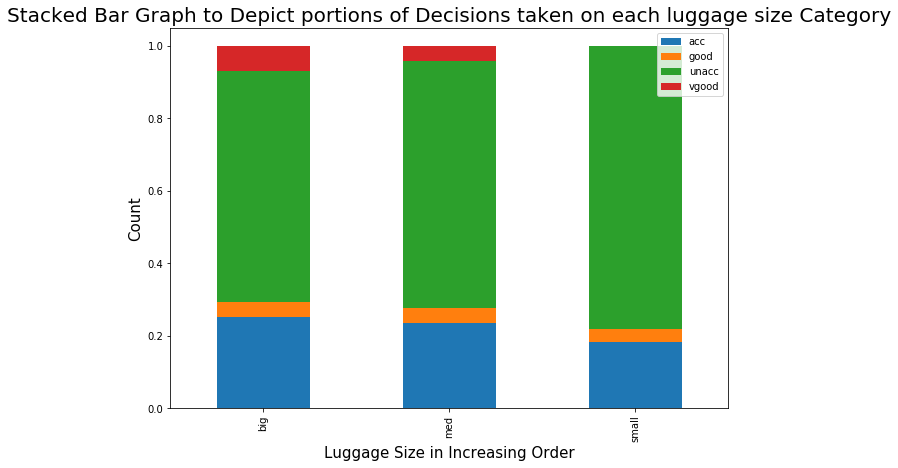

In [13]:
luggage = pd.crosstab(data['Size of Luggage Boot'], data['Decision'])
luggage.div(luggage.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 7))

plt.title('Stacked Bar Graph to Depict portions of Decisions taken on each luggage size Category', fontsize = 20)
plt.xlabel('Luggage Size in Increasing Order', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.legend()
plt.show()

In [14]:
data['Decision'].value_counts().sort_index()

acc       384
good       69
unacc    1210
vgood      65
Name: Decision, dtype: int64

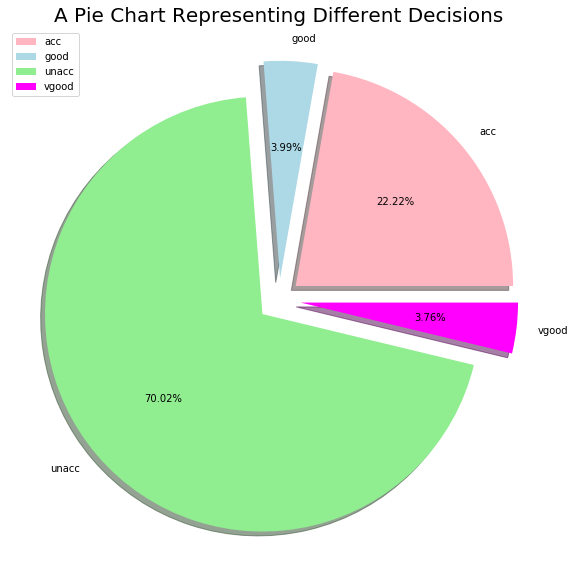

In [15]:
labels = ['acc', 'good', 'unacc', 'vgood']
colors = ['lightpink', 'lightblue', 'lightgreen', 'magenta']
size = [384, 69, 1210, 65]
explode = [0.1, 0.1, 0.1, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title('A Pie Chart Representing Different Decisions', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [16]:
data['Size of Luggage Boot'].value_counts().sort_index()

big      576
med      576
small    576
Name: Size of Luggage Boot, dtype: int64

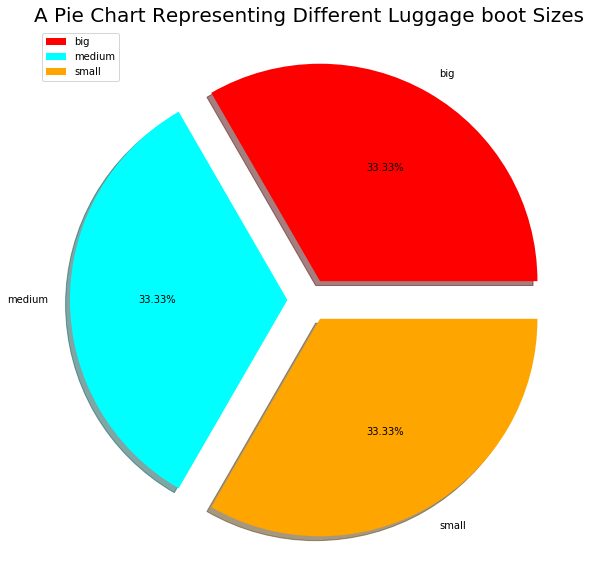

In [17]:
labels = ['big', 'medium', 'small',]
colors = ['red', 'cyan', 'orange']
size = [576, 576, 576]
explode = [0.1, 0.1, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('A Pie Chart Representing Different Luggage boot Sizes', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [18]:
data['safety'].value_counts().sort_index()

high    576
low     576
med     576
Name: safety, dtype: int64

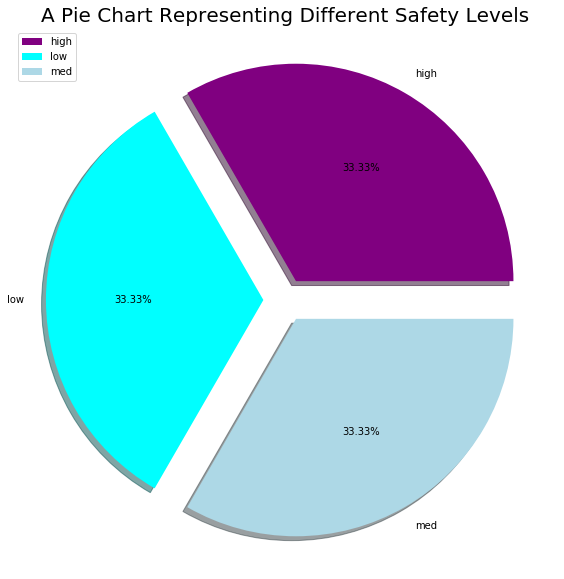

In [19]:
labels = ['high', 'low', 'med']
colors = ['purple', 'cyan', 'lightblue']
size = [576, 576, 576]
explode = [0.1, 0.1, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('A Pie Chart Representing Different Safety Levels', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [20]:
data['Price'].value_counts().sort_index()

high     432
low      432
med      432
vhigh    432
Name: Price, dtype: int64

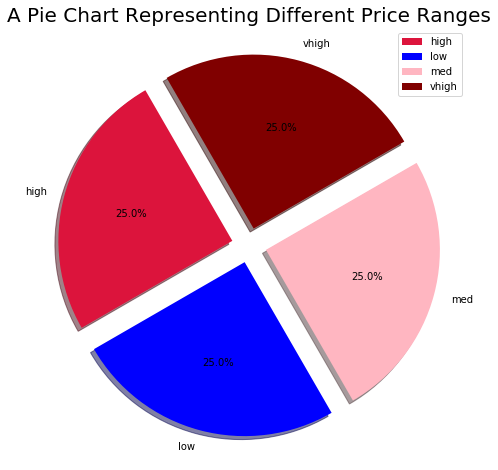

In [21]:
labels = ['high', 'low', 'med', 'vhigh']
colors = ['crimson', 'blue', 'lightpink', 'maroon']
size = [432, 432, 432, 432]
explode = [0.1, 0.1, 0.1, 0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 120, autopct = '%1.1f%%')
plt.title('A Pie Chart Representing Different Price Ranges', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [22]:
data['Maintenance Cost'].value_counts().sort_index()

high     432
low      432
med      432
vhigh    432
Name: Maintenance Cost, dtype: int64

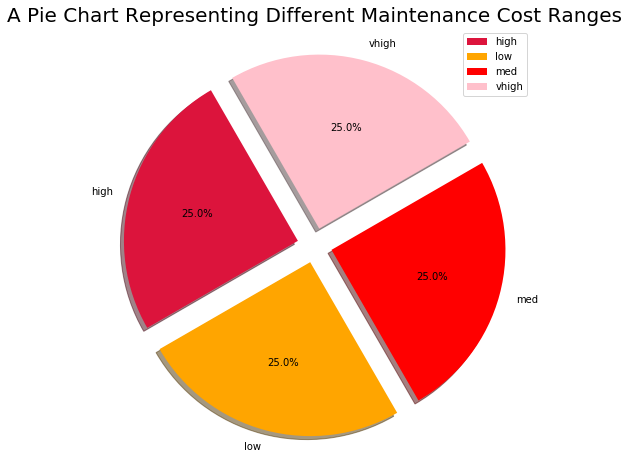

In [23]:
labels = ['high', 'low', 'med', 'vhigh']
colors = ['crimson', 'orange', 'red', 'pink']
size = [432, 432, 432, 432]
explode = [0.1, 0.1, 0.1, 0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels = labels, colors = colors, explode = explode, autopct='%1.1f%%', shadow = True, startangle = 120)
plt.title('A Pie Chart Representing Different Maintenance Cost Ranges', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [24]:
data['Number of Doors'].value_counts().sort_index()

5more    432
four     432
three    432
two      432
Name: Number of Doors, dtype: int64

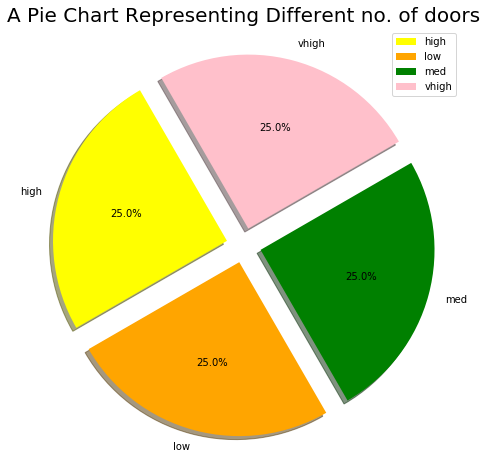

In [25]:
labels = ['high', 'low', 'med', 'vhigh']
colors = ['yellow', 'orange', 'green', 'pink']
size = [432, 432, 432, 432]
explode = [0.1, 0.1, 0.1, 0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels = labels, colors = colors, explode = explode, autopct='%1.1f%%', shadow = True, startangle = 120)
plt.title('A Pie Chart Representing Different no. of doors', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [26]:
data['Capacity'].value_counts().sort_index()

four    576
more    576
two     576
Name: Capacity, dtype: int64

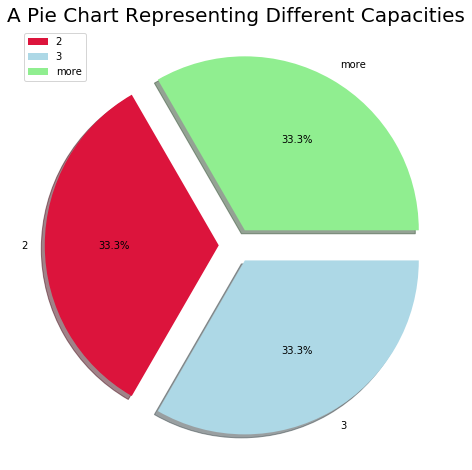

In [27]:
labels = ['2', '3', 'more']
colors = ['crimson', 'lightblue', 'lightgreen']
size = [576, 576, 576]
explode = [0.1, 0.1, 0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels = labels, colors = colors, explode = explode, autopct='%1.1f%%', shadow = True, startangle = 120)
plt.title('A Pie Chart Representing Different Capacities', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [28]:
data.describe()

,Price,Maintenance Cost,Number of Doors,Capacity,Size of Luggage Boot,safety,Decision
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,low,low,two,more,small,low,unacc
freq,432,432,432,576,576,576,1210


In [29]:
data.Decision.replace(('unacc', 'acc', 'good', 'vgood'), (0, 1, 2, 3), inplace = True)
data['Size of Luggage Boot'].replace(('small', 'med', 'big'), (0, 1, 2), inplace = True)
data['safety'].replace(('low', 'med', 'high'), (0, 1, 2), inplace = True)
data['Price'].replace(('low', 'med', 'high', 'vhigh'), (0, 1, 2, 3), inplace = True)
data['Maintenance Cost'].replace(('low', 'med', 'high', 'vhigh'), (0, 1, 2, 3), inplace = True)
data['Number of Doors'].replace(('two', 'three', 'four', '5more'), (2, 3, 4, 5), inplace = True)
data['Capacity'].replace(('two', 'four', 'more'), (2, 4, 5), inplace = True)

In [30]:
data.sample(10)

,Price,Maintenance Cost,Number of Doors,Capacity,Size of Luggage Boot,safety,Decision
1372,1,3,3,5,1,1,1
1287,0,0,2,5,0,0,0
1571,0,1,4,5,1,2,3
240,1,1,3,2,2,0,0
1115,1,0,5,4,2,2,3
329,2,3,4,2,1,2,0
469,2,3,5,2,0,1,0
1374,1,3,3,5,2,0,0
1303,3,3,3,5,2,1,0
133,0,1,2,2,2,1,0


In [31]:
x = data.iloc[:,:6]
y = data.iloc[:, 6]

print("Shape of x: ", x.shape)
print("Shape of y: ", y.shape)

Shape of x:  (1728, 6)
Shape of y:  (1728,)


In [32]:
# Label Encoding once more so that we get higher accuracy
# we have 4 classes namely 0, 1, 2, 3
# It would be very beneficial if we combine 0 and 1 as 0 and 1 and 2 as 1

data.Decision.replace((0, 1, 2, 3), (0, 0, 1, 1), inplace = True)

data['Decision'].value_counts()

0    1594
1     134
Name: Decision, dtype: int64

In [33]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 0)

print("Shape of x_train: ", x_train.shape)
print("Shape of y_train: ", y_train.shape)
print("shape of x_test: ", x_test.shape)
print("shape of y_test: ", y_test.shape)

Shape of x_train:  (1468, 6)
Shape of y_train:  (1468,)
shape of x_test:  (260, 6)
shape of y_test:  (260,)


In [34]:
# standardization


sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


## Modelling


## Logistic Regression

In [35]:
#importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# creating a model
model = LogisticRegression(C = 1)
# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the values for x-test
y_pred = model.predict(x_test)

# finding the training and testing accuracy
print("Training Accuracy: ",model.score(x_train, y_train))
print("Testing Accuracy: ", model.score(x_test, y_test))

# printing the confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy:  0.9645776566757494
Testing Accuracy:  0.9730769230769231
[[243   2]
 [  5  10]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Decision Trees with max_depth = 3

In [36]:
#importing libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

Training_Accuracy= []
Testing_Accuracy = []

for dep in range(2,21):
    # creating a model
    model = DecisionTreeClassifier(max_depth = dep)
    # feeding the training data into the model
    model.fit(x_train, y_train)

    # predicting the values for x-test
    y_pred = model.predict(x_test)
    
    # finding the training and testing accuracy
    s_train = model.score(x_train, y_train)
    s_test = model.score(x_test, y_test)
    print("Training Accuracy: ",s_train)
    print("Testing Accuracy: ", s_test)
    
    # printing the confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    
    Training_Accuracy.append(s_train*100)
    Testing_Accuracy.append(s_test*100)

print(Training_Accuracy, Testing_Accuracy)

Training Accuracy:  0.9189373297002725
Testing Accuracy:  0.9423076923076923
[[245   0]
 [ 15   0]]
Training Accuracy:  0.9325613079019074
Testing Accuracy:  0.9423076923076923
[[236   9]
 [  6   9]]
Training Accuracy:  0.9604904632152589
Testing Accuracy:  0.9692307692307692
[[243   2]
 [  6   9]]
Training Accuracy:  0.9604904632152589
Testing Accuracy:  0.9692307692307692
[[243   2]
 [  6   9]]
Training Accuracy:  0.9768392370572208
Testing Accuracy:  0.9461538461538461
[[234  11]
 [  3  12]]
Training Accuracy:  0.9850136239782016
Testing Accuracy:  0.9769230769230769
[[243   2]
 [  4  11]]
Training Accuracy:  0.9911444141689373
Testing Accuracy:  0.9807692307692307
[[241   4]
 [  1  14]]
Training Accuracy:  0.9965940054495913
Testing Accuracy:  0.9807692307692307
[[243   2]
 [  3  12]]
Training Accuracy:  0.9979564032697548
Testing Accuracy:  0.9846153846153847
[[243   2]
 [  2  13]]
Training Accuracy:  0.9993188010899182
Testing Accuracy:  0.9961538461538462
[[245   0]
 [  1  14]]


No handles with labels found to put in legend.


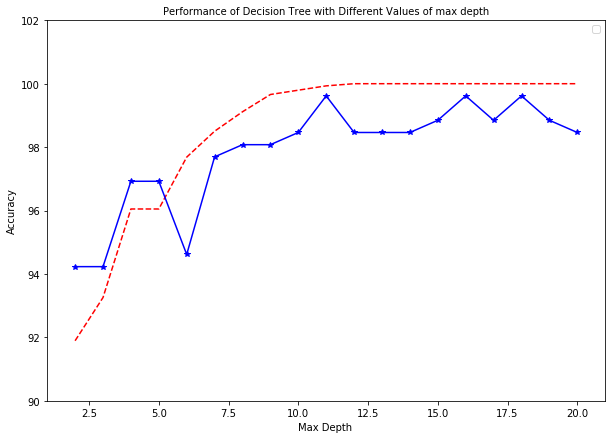

In [37]:
#  plotting the graph for performance of decision trees with different max_depth values

max_depth = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
Training_Accuracy = np.array(Training_Accuracy)
Testing_Accuracy = np.array(Testing_Accuracy)
plt.rcParams['figure.figsize'] = (10, 7)
plt.plot(max_depth, Training_Accuracy, 'r--')
plt.plot(max_depth, Testing_Accuracy, 'b-*')
plt.title('Performance of Decision Tree with Different Values of max depth', fontsize = 10)
plt.xlim([1, 21])
plt.ylim([90, 102])
plt.xlabel('Max Depth ', fontsize = 10)
plt.ylabel('Accuracy', fontsize = 10)
plt.legend()
plt.show()

##  Random Forest

In [38]:
#importing libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# creating a model
model = RandomForestClassifier()
# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the values for x-test
y_pred = model.predict(x_test)

# finding the training and testing accuracy
print("Training Accuracy: ",model.score(x_train, y_train))
print("Testing Accuracy: ", model.score(x_test, y_test))

# printing the confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy:  1.0
Testing Accuracy:  0.9884615384615385
[[244   1]
 [  2  13]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [39]:
# checking the feature importance

imp = model.feature_importances_

print(imp)

[0.25054306 0.22466366 0.04983442 0.19441536 0.08440438 0.19613912]


## KNN Classifiers

In [40]:
from sklearn.neighbors import KNeighborsClassifier

Training_Accuracy= []
Testing_Accuracy = []

for n in range(1,11):
    # creating a model
    model = KNeighborsClassifier(n_neighbors = n)

    # feeding the training data into the model
    model.fit(x_train, y_train)

    # predicting the values for x-test
    y_pred = model.predict(x_test)

    # finding the training and testing accuracy
    s_train = model.score(x_train, y_train)
    s_test = model.score(x_test, y_test)
    print("Training Accuracy: ",s_train)
    print("Testing Accuracy: ", s_test)

    # printing the confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    Training_Accuracy.append(s_train*100)
    Testing_Accuracy.append(s_test*100)
print(Training_Accuracy, Testing_Accuracy)    

Training Accuracy:  1.0
Testing Accuracy:  0.9846153846153847
[[243   2]
 [  2  13]]
Training Accuracy:  0.9952316076294278
Testing Accuracy:  0.9730769230769231
[[245   0]
 [  7   8]]
Training Accuracy:  0.9979564032697548
Testing Accuracy:  0.9807692307692307
[[243   2]
 [  3  12]]
Training Accuracy:  0.989100817438692
Testing Accuracy:  0.9769230769230769
[[245   0]
 [  6   9]]
Training Accuracy:  0.9965940054495913
Testing Accuracy:  0.9884615384615385
[[244   1]
 [  2  13]]
Training Accuracy:  0.9945504087193461
Testing Accuracy:  0.9730769230769231
[[245   0]
 [  7   8]]
Training Accuracy:  0.9959128065395095
Testing Accuracy:  0.9961538461538462
[[244   1]
 [  0  15]]
Training Accuracy:  0.9911444141689373
Testing Accuracy:  0.9846153846153847
[[245   0]
 [  4  11]]
Training Accuracy:  0.9945504087193461
Testing Accuracy:  1.0
[[245   0]
 [  0  15]]
Training Accuracy:  0.9931880108991825
Testing Accuracy:  0.9884615384615385
[[245   0]
 [  3  12]]
[100.0, 99.52316076294278, 99.7

No handles with labels found to put in legend.


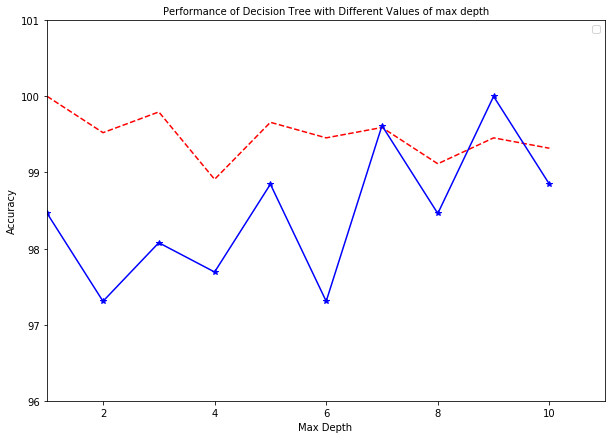

In [41]:
#  plotting the graph for performance of decision trees with different max_depth values

max_depth = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
Training_Accuracy = np.array(Training_Accuracy)
Testing_Accuracy = np.array(Testing_Accuracy)
plt.rcParams['figure.figsize'] = (10, 7)
plt.plot(max_depth, Training_Accuracy, 'r--')
plt.plot(max_depth, Testing_Accuracy, 'b-*')
plt.title('Performance of Decision Tree with Different Values of max depth', fontsize = 10)
plt.xlim([1, 11])
plt.ylim([96, 101])
plt.xlabel('Max Depth ', fontsize = 10)
plt.ylabel('Accuracy', fontsize = 10)
plt.legend()
plt.show()